In [1]:
import pandas as pd
import numpy as np
from prepare import prep_codeup_data, handle_nulls
from acquire import acquire_codeup_data
import matplotlib.pyplot as plt
import seaborn as sns

# Acquire

First we must acquire the data we will be using, all the functions needed for this are located in the acquire.py and prepare.py files.

In [2]:
logs = prep_codeup_data()
logs.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1,8,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22,97.105.19.61,2018,1,26,9,Friday,Teddy,2018-01-08,2018-05-17,2.0


# Prepare

Now we will need to make sure all of the data is prepped and ready for exploration.

In [3]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   page_viewed  719458 non-null  object 
 1   user_id      719459 non-null  object 
 2   cohort_id    674619 non-null  object 
 3   ip           719459 non-null  object 
 4   year         719459 non-null  object 
 5   month        719459 non-null  object 
 6   day          719459 non-null  object 
 7   hour         719459 non-null  object 
 8   weekday      719459 non-null  object 
 9   name         674619 non-null  object 
 10  start_date   674619 non-null  object 
 11  end_date     674619 non-null  object 
 12  program_id   674619 non-null  float64
dtypes: float64(1), object(12)
memory usage: 76.8+ MB


In [4]:
logs = handle_nulls(logs)

In [5]:
logs.head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-01-26 09:55:03,/,1,8.0,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:05,java-ii/object-oriented-programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:06,slides/object_oriented_programming,1,8.0,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 09:56:24,javascript-i/conditionals,2,22.0,97.105.19.61,2018,1,26,9,Friday,Teddy,2018-01-08,2018-05-17,2.0


In [6]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   page_viewed  719458 non-null  object 
 1   user_id      719459 non-null  object 
 2   cohort_id    719459 non-null  float64
 3   ip           719459 non-null  object 
 4   year         719459 non-null  object 
 5   month        719459 non-null  object 
 6   day          719459 non-null  object 
 7   hour         719459 non-null  object 
 8   weekday      719459 non-null  object 
 9   name         719459 non-null  object 
 10  start_date   719459 non-null  object 
 11  end_date     719459 non-null  object 
 12  program_id   719459 non-null  float64
dtypes: float64(2), object(11)
memory usage: 76.8+ MB


In [7]:
logs.start_date = pd.to_datetime(logs.start_date)
logs.end_date = pd.to_datetime(logs.end_date)

In [8]:
logs.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 719459 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   page_viewed  719458 non-null  object        
 1   user_id      719459 non-null  object        
 2   cohort_id    719459 non-null  float64       
 3   ip           719459 non-null  object        
 4   year         719459 non-null  object        
 5   month        719459 non-null  object        
 6   day          719459 non-null  object        
 7   hour         719459 non-null  object        
 8   weekday      719459 non-null  object        
 9   name         719459 non-null  object        
 10  start_date   719459 non-null  datetime64[ns]
 11  end_date     719459 non-null  datetime64[ns]
 12  program_id   719459 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 76.8+ MB


### I would like to split the data into the different program types (Web Dev vs. Data Science)
To do this I will first need to figure out what each program id stands for.

In [9]:
logs[logs.program_id == 1].name.value_counts()

Lassen        9495
Arches        8884
Olympic       4925
Kings         2733
Hampton       1712
Quincy        1165
Glacier        495
Joshua         302
Ike            208
Badlands        93
Franklin        72
Denali           4
Everglades       1
Name: name, dtype: int64

Based on the codeup alumni page 'https://alumni.codeup.com/' program id 1 is all web dev programs based on their cohort names.

In [10]:
logs[logs.program_id == 2].name.value_counts()

Staff         60315
Ceres         40168
Zion          37548
Fortuna       36047
Voyageurs     35624
Ganymede      32447
Apex          31670
Teddy         30328
Deimos        29688
Hyperion      28354
Betelgeuse    28333
Ulysses       28329
Xanadu        27637
Europa        27518
Wrangell      25427
Andromeda     25253
Yosemite      20447
Bash          11774
Jupiter        8718
Sequoia        7444
Pinnacles      2005
Niagara         743
Mammoth         691
Name: name, dtype: int64

Program id 2 is also web dev programs based on the cohort names, however it does have Staff listed in there.

In [11]:
logs[logs.program_id == 3].name.value_counts()

Bayes     25181
Darden    22425
Curie     20411
Name: name, dtype: int64

Program id 3 is the data science program id.

In [12]:
logs[logs.program_id == 4].name.value_counts()

Apollo    5
Name: name, dtype: int64

Program id 4 is a web dev program id. Apollo is the only one in this group and there's a really small amount of data.

**Web Dev Program IDs:** 1, 2, 4  
**Data Science Program IDs:** 3  

Now that we know which program is which we can split them into their own dataframes.

In [13]:
webdev = logs[(logs.program_id == 1) | (logs.program_id == 2) | (logs.program_id == 4)]
datasci = logs[logs.program_id == 3]

In [14]:
webdev.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 606602 entries, 2018-01-26 09:55:03 to 2020-11-02 16:48:47
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   page_viewed  606602 non-null  object        
 1   user_id      606602 non-null  object        
 2   cohort_id    606602 non-null  float64       
 3   ip           606602 non-null  object        
 4   year         606602 non-null  object        
 5   month        606602 non-null  object        
 6   day          606602 non-null  object        
 7   hour         606602 non-null  object        
 8   weekday      606602 non-null  object        
 9   name         606602 non-null  object        
 10  start_date   606602 non-null  datetime64[ns]
 11  end_date     606602 non-null  datetime64[ns]
 12  program_id   606602 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 64.8+ MB


In [15]:
datasci.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 68017 entries, 2019-08-20 09:39:58 to 2020-11-02 15:57:29
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   page_viewed  68016 non-null  object        
 1   user_id      68017 non-null  object        
 2   cohort_id    68017 non-null  float64       
 3   ip           68017 non-null  object        
 4   year         68017 non-null  object        
 5   month        68017 non-null  object        
 6   day          68017 non-null  object        
 7   hour         68017 non-null  object        
 8   weekday      68017 non-null  object        
 9   name         68017 non-null  object        
 10  start_date   68017 non-null  datetime64[ns]
 11  end_date     68017 non-null  datetime64[ns]
 12  program_id   68017 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 7.3+ MB


There was a chunk of program ids of 0 so for now we will put them into an unknown dataframe.

In [16]:
unknown = logs[logs.program_id == 0]
unknown.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 44840 entries, 2018-01-26 16:46:16 to 2020-11-02 16:30:49
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   page_viewed  44840 non-null  object        
 1   user_id      44840 non-null  object        
 2   cohort_id    44840 non-null  float64       
 3   ip           44840 non-null  object        
 4   year         44840 non-null  object        
 5   month        44840 non-null  object        
 6   day          44840 non-null  object        
 7   hour         44840 non-null  object        
 8   weekday      44840 non-null  object        
 9   name         44840 non-null  object        
 10  start_date   44840 non-null  datetime64[ns]
 11  end_date     44840 non-null  datetime64[ns]
 12  program_id   44840 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(9)
memory usage: 4.8+ MB


# Explore
## Here we will try and answer the questions given to us

 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?
 2. Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over? 
 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students? 
 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents? 
 5. At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before? 
 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)? 
 7. Which lessons are least accessed? 
 8. Anything else I should be aware of? 

### 1. Which lesson appears to attract the most traffic consistently across cohorts (per program)?

### Web Dev

In order to answer this I will create a dataframe that contains the average amount of times each page was viewed by each cohort.  
Then by sorting values we can find out which page has the highest average traffic across all the cohorts.

In [17]:
# First we need to create a dataframe that holds how many times each page was visited by each cohort
webdev_views = pd.crosstab(webdev.page_viewed, webdev.name)

In [18]:
# Now we will add an new column that contains the average number of views for that page per cohort
webdev_views['avg_views_per_cohort'] = webdev_views.mean(axis=1)
webdev_views.head()

name,Andromeda,Apex,Apollo,Arches,Badlands,Bash,Betelgeuse,Ceres,Deimos,Denali,...,Sequoia,Staff,Teddy,Ulysses,Voyageurs,Wrangell,Xanadu,Yosemite,Zion,avg_views_per_cohort
page_viewed,,,,,,,,,,,,,,,,,,,,,
.git,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.027027
.gitignore,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.027027
.well-known/assetlinks.json,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.054054
/,1156,1244,1,622,17,532,868,1620,1319,1,...,630,4633,1754,1618,2098,1112,916,962,1756,828.864865
00_,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0.027027


In [19]:
# Now we use a .sort_values to find out which page has the highest average views per cohort
webdev_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace=True)

In [20]:
webdev_views[['avg_views_per_cohort']].head(4)

name,avg_views_per_cohort
page_viewed,
/,828.864865
javascript-i,375.729730
toc,362.270270
search/search_index.json,331.648649


Ignoring the base page of '/', the next three are the top viewed lessons for web dev students.

### Data Science

Now we will do the same for data science.

In [21]:
# First we need to create a dataframe that holds how many times each page was visited by each cohort
datasci_views = pd.crosstab(datasci.page_viewed, datasci.name)

In [22]:
# Now we will add an new column that contains the average number of views for that page per cohort
datasci_views['avg_views_per_cohort'] = datasci_views.mean(axis=1)
# Now we use a .sort_values to find out which page has the highest average views per cohort
datasci_views.sort_values(by='avg_views_per_cohort', ascending=False, inplace=True)

datasci_views[['avg_views_per_cohort']].head(4)

name,avg_views_per_cohort
page_viewed,
/,1802.000000
1-fundamentals/modern-data-scientist.jpg,521.000000
1-fundamentals/AI-ML-DL-timeline.jpg,519.666667
1-fundamentals/1.1-intro-to-data-science,512.000000


Ignoring the base page of '/' the next three are the top viewed lessons for data science students.

## Question 1 Answers:

Web Dev Most Visited Page: **javascript-i**  
Data Science Most Visited Page:  **1-fundamentals/1.1-intro-to-data-science**

### 2. Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?

### Web Dev

In [23]:
webdev_view_sum = pd.crosstab(webdev.page_viewed, webdev.name)

webdev_view_sum['summed_views'] = webdev_view_sum.sum(axis=1)

webdev_view_sum.sort_values(by='summed_views', ascending=False, inplace=True)

webdev_view_sum[['summed_views']].head(10)

name,summed_views
page_viewed,
/,30668
javascript-i,13902
toc,13404
search/search_index.json,12271
java-iii,10610
html-css,10363
java-ii,9956
spring,9699
jquery,8846


In [24]:
cols = ['javascript-i', 'java-iii', 'html-css', 'java-ii', 'spring', 'jquery', 'mysql']
webdev_lessons = webdev[webdev.page_viewed.isin(cols)]
webdev_lessons

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-01-26 09:56:02,java-ii,1,8.0,97.105.19.61,2018,1,26,9,Friday,Hampton,2015-09-22,2016-02-06,1.0
2018-01-26 10:00:39,javascript-i,6,22.0,97.105.19.61,2018,1,26,10,Friday,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:14:51,javascript-i,11,1.0,97.105.19.61,2018,1,26,10,Friday,Arches,2014-02-04,2014-04-22,1.0
2018-01-26 10:15:23,javascript-i,6,22.0,97.105.19.61,2018,1,26,10,Friday,Teddy,2018-01-08,2018-05-17,2.0
2018-01-26 10:18:24,spring,10,21.0,97.105.19.61,2018,1,26,10,Friday,Sequoia,2017-09-27,2018-02-15,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 16:13:52,java-iii,747,61.0,70.125.129.102,2020,11,2,16,Monday,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:18:30,spring,733,61.0,107.77.220.169,2020,11,2,16,Monday,Bash,2020-07-20,2021-01-21,2.0
2020-11-02 16:25:52,jquery,314,28.0,72.178.123.235,2020,11,2,16,Monday,Staff,2014-02-04,2014-02-04,2.0


In [25]:
webdev_lesson_cohorts = pd.crosstab(webdev_lessons.name, webdev_lessons.page_viewed)
webdev_lesson_cohorts.head()

page_viewed,html-css,java-ii,java-iii,javascript-i,jquery,mysql,spring
name,,,,,,,
Andromeda,372,395,430,509,335,346,485
Apex,708,595,616,610,437,445,572
Arches,215,167,153,294,133,95,192
Badlands,2,0,0,1,0,0,0
Bash,214,190,72,319,233,136,29


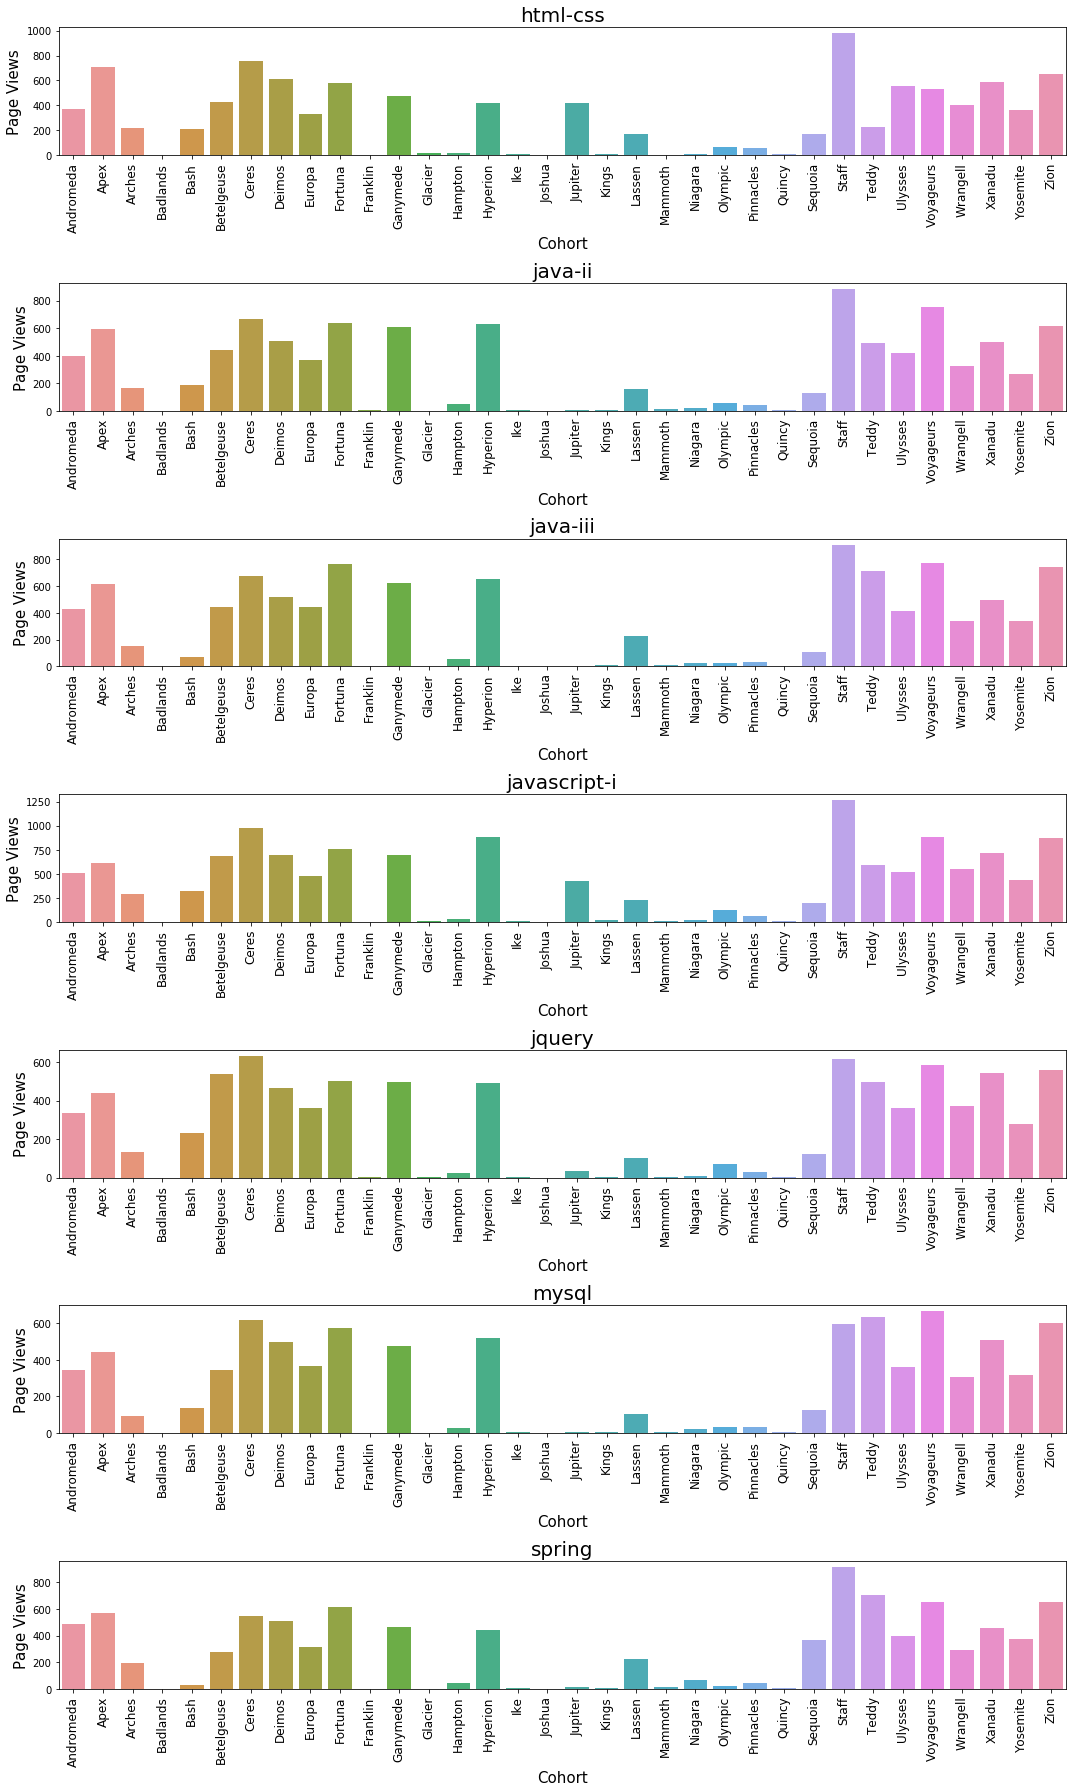

In [26]:
i = 1

plt.figure(figsize=(15, 25))

for col in webdev_lesson_cohorts.columns:
    plt.subplot(7, 1, i)
    i += 1
    sns.barplot(x = webdev_lesson_cohorts.index, y = webdev_lesson_cohorts[col])
    plt.xticks(rotation=90, fontsize=12)
    plt.title(col, fontsize=20)
    plt.xlabel('Cohort', fontsize=15)
    plt.ylabel('Page Views', fontsize=15)

plt.tight_layout()

### Data Science

In [27]:
datasci_view_sum = pd.crosstab(datasci.page_viewed, datasci.name)

datasci_view_sum['summed_views'] = datasci_view_sum.sum(axis=1)

datasci_view_sum.sort_values(by='summed_views', ascending=False, inplace=True)

datasci_view_sum[['summed_views']].head(10)

name,summed_views
page_viewed,
/,5406
1-fundamentals/modern-data-scientist.jpg,1563
1-fundamentals/AI-ML-DL-timeline.jpg,1559
1-fundamentals/1.1-intro-to-data-science,1536
search/search_index.json,1331
6-regression/1-overview,1123
classification/overview,860
10-anomaly-detection/AnomalyDetectionCartoon.jpeg,745
10-anomaly-detection/1-overview,742


In [28]:
cols = ['1-fundamentals/1.1-intro-to-data-science', '6-regression/1-overview', 'classification/overview', '10-anomaly-detection/1-overview', '3-sql/1-mysql-overview']

datasci_lessons = datasci[datasci.page_viewed.isin(cols)]
datasci_lessons

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-08-20 09:40:28,3-sql/1-mysql-overview,470,34.0,97.105.19.58,2019,8,20,9,Tuesday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:02,1-fundamentals/1.1-intro-to-data-science,469,34.0,97.105.19.58,2019,8,20,9,Tuesday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:28,1-fundamentals/1.1-intro-to-data-science,480,34.0,97.105.19.58,2019,8,20,9,Tuesday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:41:36,1-fundamentals/1.1-intro-to-data-science,482,34.0,97.105.19.58,2019,8,20,9,Tuesday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-20 09:42:10,1-fundamentals/1.1-intro-to-data-science,472,34.0,97.105.19.58,2019,8,20,9,Tuesday,Bayes,2019-08-19,2020-01-30,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 13:37:41,classification/overview,685,59.0,99.76.233.212,2020,11,2,13,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 13:42:46,classification/overview,696,59.0,67.11.85.236,2020,11,2,13,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:20:32,classification/overview,685,59.0,99.76.233.212,2020,11,2,15,Monday,Darden,2020-07-13,2021-01-12,3.0


In [29]:
datasci_lesson_cohorts = pd.crosstab(datasci_lessons.name, datasci_lessons.page_viewed)
datasci_lesson_cohorts.head()

page_viewed,1-fundamentals/1.1-intro-to-data-science,10-anomaly-detection/1-overview,3-sql/1-mysql-overview,6-regression/1-overview,classification/overview
name,,,,,
Bayes,615,383,142,521,10
Curie,461,345,441,595,91
Darden,460,14,121,7,759


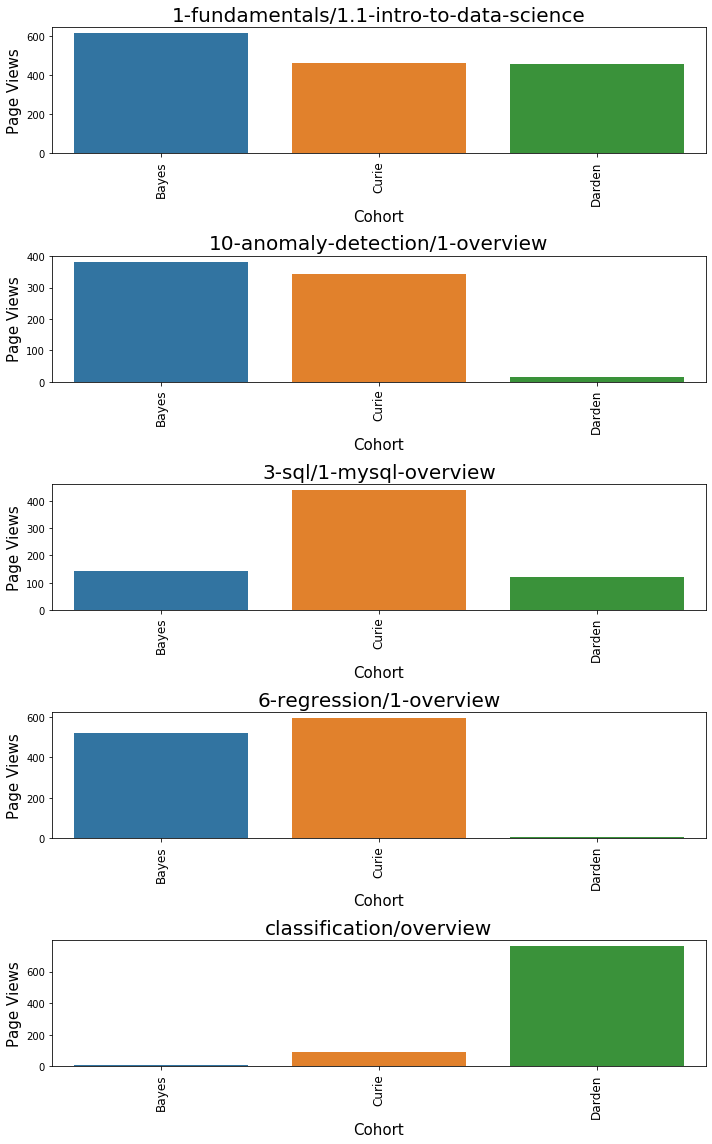

In [30]:
i = 1

plt.figure(figsize=(10, 16))

for col in datasci_lesson_cohorts.columns:
    plt.subplot(5, 1, i)
    i += 1
    sns.barplot(x = datasci_lesson_cohorts.index, y = datasci_lesson_cohorts[col])
    plt.xticks(rotation=90, fontsize=12)
    plt.title(col, fontsize=20)
    plt.xlabel('Cohort', fontsize=15)
    plt.ylabel('Page Views', fontsize=15)

plt.tight_layout()

## Question 2 Answers:

**Web Dev:** I could not identify any specific cohort that viewed a page any more than the others. Most of the pages that had high views were being viewed highly by multiple cohorts.

**Data Science:** There are a few pages that have interesting view counts, for 'classification/overview' the Darden cohort visited the page vastly more than either Curie or Bayes.  
Both '6-regression/1-overview' and '10-anomaly-detection/1-overview' were viewed much more by Curie and Bayes while Darden barely has any views on it.  
Finally Curie viewed '3-sql/1-mysql-overview' significantly more than either Darden or Bayes.

### 3. Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?

### Web Dev  
The first step here is to create a dataframe that only contains logs from active students (access is between start and end date of students cohort)

In [31]:
webdev_active = webdev[(webdev.index >= webdev.start_date) & (webdev.index <= webdev.end_date)]

In [32]:
webdev_active.groupby('user_id')['page_viewed'].count().sort_values().head()

user_id
619     1
278     4
539     5
388     8
572    12
Name: page_viewed, dtype: int64

Our users with the lowest amount of access are: 619, 278, 539, and 388  
I will leave out 572 as it has at least over 10 logs

### User 619

In [33]:
webdev_active[webdev_active.user_id == 619]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-03-23 14:10:17,/,619,57.0,97.105.19.58,2020,3,23,14,Monday,Ganymede,2020-03-23,2020-08-20,2.0


In [34]:
webdev[webdev.user_id == 619]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-03-23 14:10:17,/,619,57.0,97.105.19.58,2020,3,23,14,Monday,Ganymede,2020-03-23,2020-08-20,2.0


In [35]:
webdev[webdev.ip == '97.105.19.58'].user_id.value_counts()

11     7049
64     5690
53     4895
314    3474
1      3099
       ... 
619       1
592       1
278       1
461       1
629       1
Name: user_id, Length: 337, dtype: int64

User 619 only has one access log regardless of whether they were active or not.  
This may have been a student who had to have their user id changed or they dropped out after the first day, it's hard to tell what exactly is going on.  
The user does share an ip with 337 other users.

### User 278

In [36]:
webdev_active[webdev_active.user_id == 278]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-09-27 13:57:44,/,278,24.0,97.105.19.58,2018,9,27,13,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:47:37,java-ii/arrays,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0


In [37]:
webdev[webdev.user_id == 278]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-09-27 13:57:44,/,278,24.0,97.105.19.58,2018,9,27,13,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:47:37,java-ii/arrays,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-10-16 18:55:42,/,278,24.0,67.11.175.66,2018,10,16,18,Tuesday,Voyageurs,2018-05-29,2018-10-11,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-02-09 17:31:50,mysql/introduction,278,24.0,67.11.175.66,2019,2,9,17,Saturday,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:35:43,mysql/tables,278,24.0,67.11.175.66,2019,2,9,17,Saturday,Voyageurs,2018-05-29,2018-10-11,2.0
2019-02-09 17:37:19,mysql/basic-statements,278,24.0,67.11.175.66,2019,2,9,17,Saturday,Voyageurs,2018-05-29,2018-10-11,2.0


In [38]:
webdev[webdev.user_id == 278].ip.value_counts()

67.11.175.66    64
107.77.217.9     3
97.105.19.58     1
Name: ip, dtype: int64

In [39]:
webdev[webdev.ip == '67.11.175.66'].user_id.value_counts()

196    256
278     64
Name: user_id, dtype: int64

In [40]:
webdev[webdev.user_id == 196]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-05-29 14:42:50,/,196,24.0,97.105.19.61,2018,5,29,14,Tuesday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:22:48,html-css,196,24.0,67.11.175.66,2018,5,30,1,Wednesday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:08,html-css/introduction,196,24.0,67.11.175.66,2018,5,30,1,Wednesday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:14,html-css/elements,196,24.0,67.11.175.66,2018,5,30,1,Wednesday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-05-30 01:23:25,html-css/forms,196,24.0,67.11.175.66,2018,5,30,1,Wednesday,Voyageurs,2018-05-29,2018-10-11,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-27 13:56:45,java-i/methods,196,24.0,97.105.19.58,2018,9,27,13,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 13:56:57,java-ii,196,24.0,97.105.19.58,2018,9,27,13,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 13:56:59,java-ii/object-oriented-programming,196,24.0,97.105.19.58,2018,9,27,13,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0


In [41]:
webdev[webdev.ip == '107.77.217.9']

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-09-27 14:47:37,java-ii/arrays,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:58:48,java-ii/arrays,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0
2018-09-27 14:59:07,java-ii/collections,278,24.0,107.77.217.9,2018,9,27,14,Thursday,Voyageurs,2018-05-29,2018-10-11,2.0


In [42]:
webdev[webdev.ip == '97.105.19.58'].user_id.value_counts()

11     7049
64     5690
53     4895
314    3474
1      3099
       ... 
619       1
592       1
278       1
461       1
629       1
Name: user_id, Length: 337, dtype: int64

User 278 only accessed the curriculum 4 times during their active student period, they then went on to access it 64 more times after their cohort ended.  
They used 3 different ips for their access.  
One of their ips was split entirely between User 278 and User 196. User 196 accessed the curriculum throughout the cohort and User 278 only became active in the last month which leads me to believe they may be the same user who happened to have their user id swapped.

### User 539

In [43]:
webdev_active[webdev_active.user_id == 539]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-11-04 16:19:26,/,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:34,toc,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:02,html-css,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:38,html-css/introduction,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:45,html-css/elements,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0


In [44]:
webdev[webdev.user_id == 539]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-11-04 16:19:26,/,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:19:34,toc,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:02,html-css,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:38,html-css/introduction,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
2019-11-04 16:54:45,html-css/elements,539,52.0,97.105.19.58,2019,11,4,16,Monday,Europa,2019-11-04,2020-04-17,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-08 16:34:29,html-css/css-ii/bootstrap-grid-system,539,28.0,70.123.228.62,2020,7,8,16,Wednesday,Staff,2014-02-04,2014-02-04,2.0
2020-07-08 16:34:59,toc,539,28.0,70.123.228.62,2020,7,8,16,Wednesday,Staff,2014-02-04,2014-02-04,2.0
2020-07-13 14:55:37,/,539,28.0,70.123.228.62,2020,7,13,14,Monday,Staff,2014-02-04,2014-02-04,2.0


In [45]:
webdev[webdev.ip == '97.105.19.58'].user_id.value_counts()

11     7049
64     5690
53     4895
314    3474
1      3099
       ... 
619       1
592       1
278       1
461       1
629       1
Name: user_id, Length: 337, dtype: int64

In [46]:
webdev[webdev.ip == '70.123.228.62'].user_id.value_counts()

539    27
Name: user_id, dtype: int64

User 539 accessed the curriculum 5 times during their active period and another 75 times once out of the cohort.  
During their active period they only accessed the curriculum on their first day in class.  
Users ip was shared with 336 other users.  

It's possible this user had their user id changed the first day of class but due to the lack of information on them it's hard to pin down what their new id could be.

### User 388

In [47]:
webdev_active[webdev_active.user_id == 388]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-03-19 09:50:19,/,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 09:50:23,html-css,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 09:50:28,html-css/elements,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 10:04:11,html-css/elements,388,31.0,97.105.19.58,2019,3,19,10,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 10:19:32,html-css/elements,388,31.0,97.105.19.58,2019,3,19,10,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 11:11:51,html-css/forms,388,31.0,97.105.19.58,2019,3,19,11,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 11:12:02,html-css/elements,388,31.0,97.105.19.58,2019,3,19,11,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 12:19:23,html-css/elements,388,31.0,97.105.19.58,2019,3,19,12,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0


In [48]:
webdev[webdev.user_id == 388]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-03-19 09:50:19,/,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 09:50:23,html-css,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 09:50:28,html-css/elements,388,31.0,97.105.19.58,2019,3,19,9,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 10:04:11,html-css/elements,388,31.0,97.105.19.58,2019,3,19,10,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 10:19:32,html-css/elements,388,31.0,97.105.19.58,2019,3,19,10,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 11:11:51,html-css/forms,388,31.0,97.105.19.58,2019,3,19,11,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 11:12:02,html-css/elements,388,31.0,97.105.19.58,2019,3,19,11,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-19 12:19:23,html-css/elements,388,31.0,97.105.19.58,2019,3,19,12,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0


User 388 only accessed the curriculum 8 times whether they were active or not, and all were on the first day of class.  
They used the same ip that 336 other user used.  
It's possible that this user had their user id changed the first day but due to lack of information it's hard to pin down what their new id could be.

## Data Science

In [49]:
datasci_active = datasci[(datasci.index >= datasci.start_date) & (datasci.index <= datasci.end_date)]

In [50]:
datasci_active.groupby('user_id')['page_viewed'].count().sort_values().head(3)

user_id
679    11
697    13
487    17
Name: page_viewed, dtype: int64

Our users with the lowest amount of access logs are 679, 697, and 487.

### User 679

In [51]:
datasci_active[datasci_active.user_id == 679]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-07-13 14:37:22,/,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,14,8,Tuesday,Darden,2020-07-13,2021-01-12,3.0


In [52]:
datasci[datasci.user_id == 679]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-07-13 14:37:22,/,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:21,13-advanced-topics/1-tidy-data,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:36,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 14:39:37,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,2020,7,13,14,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:31,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/modern-data-scientist.jpg,679,59.0,24.28.146.155,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:49:32,1-fundamentals/AI-ML-DL-timeline.jpg,679,59.0,24.28.146.155,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:05:15,1-fundamentals/1.1-intro-to-data-science,679,59.0,24.28.146.155,2020,7,14,8,Tuesday,Darden,2020-07-13,2021-01-12,3.0


In [53]:
datasci[datasci.ip == '24.28.146.155'].user_id.value_counts()

698    59
679    11
Name: user_id, dtype: int64

In [54]:
datasci[datasci.user_id == 698]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-07-14 08:18:28,1-fundamentals/1.1-intro-to-data-science,698,59.0,24.28.146.155,2020,7,14,8,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:29,modern-data-scientist.jpg,698,59.0,24.28.146.155,2020,7,14,8,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:29,AI-ML-DL-timeline.jpg,698,59.0,24.28.146.155,2020,7,14,8,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:51,1-fundamentals,698,59.0,24.28.146.155,2020,7,14,8,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 08:18:56,/,698,59.0,24.28.146.155,2020,7,14,8,Tuesday,Darden,2020-07-13,2021-01-12,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-02 15:47:59,appendix/useful_libraries,698,59.0,24.28.150.196,2020,11,2,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:48:03,appendix/ds-environment-setup,698,59.0,24.28.150.196,2020,11,2,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-11-02 15:48:14,appendix/interview_questions_students,698,59.0,24.28.150.196,2020,11,2,15,Monday,Darden,2020-07-13,2021-01-12,3.0


User 679 only accessed the logs 11 times and they were on the first two days.  
They not only share an ip with user 698 but user 698 also has their first log minutes after user 679's last log.  
It's likely that user 679 had their user id changed the second day and that 698 and 679 are the same user.

### User 697

In [55]:
datasci_active[datasci_active.user_id == 697]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-07-13 15:20:27,/,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:48,3-sql/1-mysql-overview,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/modern-data-scientist.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:50,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:59,1-fundamentals/1.2-data-science-pipeline,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:20:59,1-fundamentals/DataToAction_v2.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:21:01,1-fundamentals/1.1-intro-to-data-science,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0
2020-07-13 15:21:02,1-fundamentals/AI-ML-DL-timeline.jpg,697,59.0,136.50.70.27,2020,7,13,15,Monday,Darden,2020-07-13,2021-01-12,3.0


In [56]:
datasci[datasci.ip == '136.50.70.27'].user_id.value_counts()

699    1359
697      13
Name: user_id, dtype: int64

In [57]:
datasci[datasci.user_id == 699].head()

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-07-14 13:37:14,/,699,59.0,136.50.70.27,2020,7,14,13,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:27,3-sql/1-mysql-overview,699,59.0,136.50.70.27,2020,7,14,13,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/1.1-intro-to-data-science,699,59.0,136.50.70.27,2020,7,14,13,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/modern-data-scientist.jpg,699,59.0,136.50.70.27,2020,7,14,13,Tuesday,Darden,2020-07-13,2021-01-12,3.0
2020-07-14 13:37:29,1-fundamentals/AI-ML-DL-timeline.jpg,699,59.0,136.50.70.27,2020,7,14,13,Tuesday,Darden,2020-07-13,2021-01-12,3.0


In [58]:
datasci[datasci.ip == '136.50.70.27'].user_id.value_counts()

699    1359
697      13
Name: user_id, dtype: int64

User 697 only accessed the logs 13 times and they were on the first day.  
They not only share an ip with user 699 but user 699 also has their first log the day after user 697's last log.  
It's likely that user 697 had their user id changed the second day and that 699 and 697 are the same user.

### User 487

In [59]:
datasci_active[datasci_active.user_id == 487]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-08-30 12:01:29,/,487,34.0,97.105.19.58,2019,8,30,12,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:02:11,appendix/cli/1-intro,487,34.0,97.105.19.58,2019,8,30,12,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,34.0,97.105.19.58,2019,8,30,12,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:40,appendix/cli/0-overview,487,34.0,97.105.19.58,2019,8,30,13,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:58,appendix/cli-git-overview,487,34.0,97.105.19.58,2019,8,30,13,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0


In [60]:
datasci[datasci.user_id == 487]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-08-30 12:01:29,/,487,34.0,97.105.19.58,2019,8,30,12,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:02:11,appendix/cli/1-intro,487,34.0,97.105.19.58,2019,8,30,12,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 12:11:10,appendix/cli/2-listing-files,487,34.0,97.105.19.58,2019,8,30,12,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:40,appendix/cli/0-overview,487,34.0,97.105.19.58,2019,8,30,13,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 13:37:58,appendix/cli-git-overview,487,34.0,97.105.19.58,2019,8,30,13,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:12:22,appendix/cli/3-file-paths,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:19:45,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:32:22,appendix/cli/5-creating-files-and-directories,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0
2019-08-30 14:38:57,appendix/cli/4-navigating-the-filesystem,487,34.0,97.105.19.58,2019,8,30,14,Friday,Bayes,2019-08-19,2020-01-30,3.0


In [61]:
datasci[datasci.ip == '97.105.19.58'].user_id.value_counts()

479    1685
475    1499
476    1429
485    1196
482    1142
471     872
481     866
473     784
469     749
478     749
484     669
466     664
472     661
468     595
483     587
358     537
480     522
467     517
474     487
584     452
581     433
587     417
576     395
477     391
580     384
582     360
470     357
590     331
588     293
591     289
585     286
578     262
579     261
577     233
583     226
575     197
589     184
586     179
487      17
617       7
Name: user_id, dtype: int64

User 487 accessed the curriculum 17 times all on the first day and then never again.  
Their ip is shared with 40 other users.  

User 487 may have had their user id changed after the first day in the program but there's little information on what their new user id might be.

## Question 3 Answers:

### Web Dev:  
I identified 4 web dev students with very low page views while they were active students.
- User 619
- User 278
- User 539
- User 388

**User 619**  
User 619 only has one access log regardless of whether they were active or not.  
This may have been a student who had to have their user id changed or they dropped out after the first day, it's hard to tell what exactly is going on.  
The user does share an ip with 337 other users.  

**User 278**  
User 278 only accessed the curriculum 4 times during their active student period, they then went on to access it 64 more times after their cohort ended.  
They used 3 different ips for their access.  
One of their ips was split entirely between User 278 and User 196. User 196 accessed the curriculum throughout the cohort and User 278 only became active in the last month which leads me to believe they may be the same user who happened to have their user id swapped.  

**User 539**  
User 539 accessed the curriculum 5 times during their active period and another 75 times once out of the cohort.  
During their active period they only accessed the curriculum on their first day in class.  
Users ip was shared with 336 other users.  
It's possible this user had their user id changed the first day of class but due to the lack of information on them it's hard to pin down what their new id could be.  

**User 388**  
User 388 only accessed the curriculum 8 times whether they were active or not, and all were on the first day of class.  
They used the same ip that 336 other user used.  
It's possible that this user had their user id changed the first day but due to lack of information it's hard to pin down what their new id could be.

### Data Science:  
I indentified 3 data science students with very low page views while they were active students.  
- User 679
- User 697
- User 487  

**User 679**  
User 679 only accessed the logs 11 times and they were on the first two days.  
They not only share an ip with user 698 but user 698 also has their first log minutes after user 679's last log.  
It's likely that user 679 had their user id changed the second day and that 698 and 679 are the same user.  

**User 697**  
User 697 only accessed the logs 13 times and they were on the first day.  
They not only share an ip with user 699 but user 699 also has their first log the day after user 697's last log.  
It's likely that user 697 had their user id changed the second day and that 699 and 697 are the same user.  

**User 487**  
User 487 accessed the curriculum 17 times all on the first day and then never again.  
Their ip is shared with 40 other users.  
User 487 may have had their user id changed after the first day in the program but there's little information on what their new user id might be.

### 4. Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?

The first thing I'll do is look for users that are using an abnormally large number of ips

In [62]:
ip_count = pd.DataFrame(logs.groupby('user_id').ip.nunique().sort_values(ascending=False))
ip_count[ip_count.ip >= 20]

,ip
user_id,
228,148
533,92
530,86
226,82
460,75
...,...
469,20
488,20
540,20


In [63]:
many_ips = ip_count[ip_count.ip >= 20].index.tolist()

no_prog = logs[(logs.user_id.isin(many_ips)) & (logs.program_id == 0)]

no_prog.user_id.value_counts()

346    1042
111     753
88      334
375     132
64       25
Name: user_id, dtype: int64

In [64]:
logs[(logs.user_id == 346) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-01-23 14:24:33,/,346,29.0,97.105.19.58,2019,1,23,14,Wednesday,Zion,2019-01-22,2019-06-04,2.0
2019-01-23 14:24:55,toc,346,29.0,97.105.19.58,2019,1,23,14,Wednesday,Zion,2019-01-22,2019-06-04,2.0
2019-01-23 14:24:58,html-css/introduction,346,29.0,97.105.19.58,2019,1,23,14,Wednesday,Zion,2019-01-22,2019-06-04,2.0
2019-01-23 14:25:07,html-css/introduction,346,29.0,97.105.19.58,2019,1,23,14,Wednesday,Zion,2019-01-22,2019-06-04,2.0
2019-01-23 14:25:17,html-css/elements,346,29.0,97.105.19.58,2019,1,23,14,Wednesday,Zion,2019-01-22,2019-06-04,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-06 14:01:15,html-css/css-i/selectors-and-properties,346,29.0,76.185.211.152,2020,8,6,14,Thursday,Zion,2019-01-22,2019-06-04,2.0
2020-08-06 14:05:36,search/search_index.json,346,29.0,76.185.211.152,2020,8,6,14,Thursday,Zion,2019-01-22,2019-06-04,2.0
2020-08-06 14:05:55,html-css/forms,346,29.0,76.185.211.152,2020,8,6,14,Thursday,Zion,2019-01-22,2019-06-04,2.0


In [65]:
logs[(logs.user_id == 111) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,


In [66]:
logs[(logs.user_id == 88) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-06-01 15:14:04,/,88,7.0,66.90.136.214,2018,6,1,15,Friday,Glacier,2015-06-05,2015-10-06,1.0
2018-06-01 15:14:19,javascript-ii,88,7.0,66.90.136.214,2018,6,1,15,Friday,Glacier,2015-06-05,2015-10-06,1.0
2018-06-01 15:15:07,javascript-ii,88,7.0,66.90.136.214,2018,6,1,15,Friday,Glacier,2015-06-05,2015-10-06,1.0
2018-06-01 15:15:13,javascript-ii,88,7.0,66.90.136.214,2018,6,1,15,Friday,Glacier,2015-06-05,2015-10-06,1.0
2018-06-01 15:15:17,php,88,7.0,66.90.136.214,2018,6,1,15,Friday,Glacier,2015-06-05,2015-10-06,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-11 09:54:47,html-css,88,7.0,209.184.113.32,2019,12,11,9,Wednesday,Glacier,2015-06-05,2015-10-06,1.0
2019-12-11 09:54:48,html-css/introduction,88,7.0,209.184.113.32,2019,12,11,9,Wednesday,Glacier,2015-06-05,2015-10-06,1.0
2019-12-11 09:54:52,html-css/elements,88,7.0,209.184.113.32,2019,12,11,9,Wednesday,Glacier,2015-06-05,2015-10-06,1.0


In [67]:
logs[(logs.user_id == 375) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-03-25 20:37:16,toc,375,31.0,98.6.204.195,2019,3,25,20,Monday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-25 20:37:23,html-css/css-ii/media-queries,375,31.0,98.6.204.195,2019,3,25,20,Monday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-25 20:37:41,examples/css/media-queries.html,375,31.0,98.6.204.195,2019,3,25,20,Monday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-25 20:38:01,examples/css/media-queries.html,375,31.0,98.6.204.195,2019,3,25,20,Monday,Andromeda,2019-03-18,2019-07-30,2.0
2019-03-26 07:10:16,/,375,31.0,130.45.50.251,2019,3,26,7,Tuesday,Andromeda,2019-03-18,2019-07-30,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-24 00:23:10,mysql/database-design,375,31.0,24.243.18.90,2020,6,24,0,Wednesday,Andromeda,2019-03-18,2019-07-30,2.0
2020-06-24 00:23:22,java-iii,375,31.0,24.243.18.90,2020,6,24,0,Wednesday,Andromeda,2019-03-18,2019-07-30,2.0
2020-06-24 00:23:26,java-iii/jdbc,375,31.0,24.243.18.90,2020,6,24,0,Wednesday,Andromeda,2019-03-18,2019-07-30,2.0


In [68]:
logs[(logs.user_id == 64) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-01-29 13:50:57,/,64,1.0,97.105.19.61,2018,1,29,13,Monday,Arches,2014-02-04,2014-04-22,1.0
2018-01-29 13:51:00,mkdocs/search_index.json,64,1.0,97.105.19.61,2018,1,29,13,Monday,Arches,2014-02-04,2014-04-22,1.0
2018-01-29 13:51:04,mysql/users,64,1.0,97.105.19.61,2018,1,29,13,Monday,Arches,2014-02-04,2014-04-22,1.0
2018-01-30 10:13:09,/,64,1.0,97.105.19.61,2018,1,30,10,Tuesday,Arches,2014-02-04,2014-04-22,1.0
2018-01-30 10:13:12,spring,64,1.0,97.105.19.61,2018,1,30,10,Tuesday,Arches,2014-02-04,2014-04-22,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-29 16:59:30,mysql/group-by,64,28.0,76.25.25.4,2020,10,29,16,Thursday,Staff,2014-02-04,2014-02-04,2.0
2020-10-29 16:59:38,mysql/aliases,64,28.0,76.25.25.4,2020,10,29,16,Thursday,Staff,2014-02-04,2014-02-04,2.0
2020-10-29 16:59:58,mysql/group-by,64,28.0,76.25.25.4,2020,10,29,16,Thursday,Staff,2014-02-04,2014-02-04,2.0


In [69]:
logs[logs.user_id == 64].cohort_id.value_counts()

28.0    10627
1.0      3767
52.0       25
0.0        25
Name: cohort_id, dtype: int64

The only user with a ton of different ips is user 111 which has never been apart of a program.

In [70]:
logs[logs.user_id == 111]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2018-02-28 18:12:27,content/javascript/loops.html,111,0.0,70.117.6.133,2018,2,28,18,Wednesday,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 18:12:32,/,111,0.0,70.117.6.133,2018,2,28,18,Wednesday,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 18:12:37,javascript-i,111,0.0,70.117.6.133,2018,2,28,18,Wednesday,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 19:30:32,javascript-i/loops,111,0.0,70.117.6.133,2018,2,28,19,Wednesday,unknown,1900-01-01,1900-01-01,0.0
2018-02-28 21:00:18,javascript-i/loops,111,0.0,70.117.6.133,2018,2,28,21,Wednesday,unknown,1900-01-01,1900-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-01-04 10:38:30,spring/fundamentals/controllers,111,0.0,70.123.203.131,2019,1,4,10,Friday,unknown,1900-01-01,1900-01-01,0.0
2019-01-04 10:39:00,spring/fundamentals/security,111,0.0,70.123.203.131,2019,1,4,10,Friday,unknown,1900-01-01,1900-01-01,0.0
2019-01-04 10:39:22,spring/fundamentals/controllers,111,0.0,70.123.203.131,2019,1,4,10,Friday,unknown,1900-01-01,1900-01-01,0.0


In [71]:
logs[logs.user_id == 111].ip.nunique()

29

User 111 has used a significant amount of different ips at 29 unique ip addressess.  
They browsed the curriculum for just under a year and the speed of access indicates that it's proabably a human rather than a bot.  
Based on the fact that they haven't ever been in a program but have accessed the curriculum from 29 different ips makes them somewhat suspicious.

Bots can search through things at a much faster rate than people so for then next section I will be looking for bots by finding users that have a very fast rate of access.

In [72]:
hourly_hits = unknown[['ip']]
hourly_hits = hourly_hits.resample('H').count()
hourly_hits.head()

,ip
datetime,
2018-01-26 16:00:00,2
2018-01-26 17:00:00,1
2018-01-26 18:00:00,19
2018-01-26 19:00:00,10
2018-01-26 20:00:00,1


In [73]:
mid_band = hourly_hits.ewm(span=24).mean()

std = hourly_hits.ewm(span=24).std()

In [74]:
upper_band = mid_band + std * 3
lower_band = mid_band - std * 3

In [75]:
bb = pd.concat([upper_band, lower_band], axis=1)

hourly_hits = pd.concat([hourly_hits, mid_band, bb], axis=1)

hourly_hits.head()

,ip,ip,ip,ip
datetime,,,,
2018-01-26 16:00:00,2,2.000000,NaN,NaN
2018-01-26 17:00:00,1,1.479167,3.600487,-0.642154
2018-01-26 18:00:00,19,7.812608,38.811200,-23.185983
2018-01-26 19:00:00,10,8.429629,33.434078,-16.574820
2018-01-26 20:00:00,1,6.686191,30.366862,-16.994481


In [76]:
hourly_hits.columns = ['hourly_hits', 'midband', 'upper_band', 'lower_band']

In [77]:
hourly_hits['pct_b'] = (hourly_hits['hourly_hits'] - hourly_hits['lower_band']) / (hourly_hits['upper_band'] - hourly_hits['lower_band'])

anomaly_hits = hourly_hits[hourly_hits['pct_b'] > 1]

anomaly_hits.sort_values('hourly_hits', ascending=False).head(5)

,hourly_hits,midband,upper_band,lower_band,pct_b
datetime,,,,,
2019-03-28 14:00:00,233,33.514876,229.710308,-162.680557,1.008384
2020-11-02 13:00:00,227,26.337078,211.192894,-158.518738,1.042755
2019-04-25 15:00:00,209,21.306114,192.246938,-149.634711,1.049003
2019-02-15 09:00:00,198,24.110886,188.745232,-140.523460,1.028107
2020-09-11 13:00:00,182,23.191655,171.532974,-125.149663,1.035280


In [78]:
day_1 = unknown['2019-03-28']

day_1[day_1.index.hour == 14].user_id.value_counts().head()

354    62
363    42
368    23
361    19
366    19
Name: user_id, dtype: int64

In [79]:
user_354 = day_1[(day_1['user_id'] == 354) & (day_1.index.hour == 14)]
user_354

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-03-28 14:02:15,search/search_index.json,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:02:34,6.6.2_Decision_Tree,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:03:13,search/search_index.json,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:03:54,search/search_index.json,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:05:41,Multivariate_Regression_Excel,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-03-28 14:47:46,6_Exercises,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:56:41,search/search_index.json,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-03-28 14:57:03,6_Exercises,354,0.0,97.105.19.58,2019,3,28,14,Thursday,unknown,1900-01-01,1900-01-01,0.0


In [80]:
logs[(logs.user_id == 354) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,


In [81]:
logs[logs.user_id == 354]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-02-04 16:44:49,/,354,0.0,97.105.19.58,2019,2,4,16,Monday,unknown,1900-01-01,1900-01-01,0.0
2019-02-04 17:04:26,/,354,0.0,97.105.19.58,2019,2,4,17,Monday,unknown,1900-01-01,1900-01-01,0.0
2019-02-05 08:46:32,/,354,0.0,97.105.19.58,2019,2,5,8,Tuesday,unknown,1900-01-01,1900-01-01,0.0
2019-02-05 09:20:34,3.0-mysql-overview,354,0.0,97.105.19.58,2019,2,5,9,Tuesday,unknown,1900-01-01,1900-01-01,0.0
2019-02-05 09:20:51,1._Fundamentals,354,0.0,97.105.19.58,2019,2,5,9,Tuesday,unknown,1900-01-01,1900-01-01,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-20 10:46:16,python/imports,354,0.0,173.172.170.236,2020,10,20,10,Tuesday,unknown,1900-01-01,1900-01-01,0.0
2020-10-20 10:47:10,python/overview,354,0.0,173.172.170.236,2020,10,20,10,Tuesday,unknown,1900-01-01,1900-01-01,0.0
2020-10-20 10:47:15,python/introduction-to-python,354,0.0,173.172.170.236,2020,10,20,10,Tuesday,unknown,1900-01-01,1900-01-01,0.0


In [82]:
logs[logs.user_id == 354].ip.nunique()

12

User 354 is very suspicious because they have never been in a program and they had 62 hits in an hour on this day.  
They have also accessed the curriculum a lot.

In [83]:
day_2 = unknown['2020-11-02']

day_2[day_2.index.hour == 13].user_id.value_counts().head(5)

713    32
721    28
720    27
728    23
727    23
Name: user_id, dtype: int64

In [84]:
user_713 = day_2[(day_2['user_id'] == 713) & (day_2.index.hour == 13)]
user_713

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-11-02 13:40:04,mysql,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:40:07,mysql/introduction,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:41:40,mysql/users,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:42:17,mysql/databases,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:43:10,mysql/tables,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:43:23,mysql/basic-statements,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:43:56,mysql/sample-database,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:44:04,mysql/aliases,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0
2020-11-02 13:44:46,mysql/group-by,713,0.0,136.50.11.90,2020,11,2,13,Monday,unknown,1900-01-01,1900-01-01,0.0


In [85]:
logs[(logs.user_id == 713) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,


In [86]:
logs[logs.user_id == 713].ip.nunique()

1

User 713 has never been in a program however the speed at which they were browsing the curriculum doesn't indicate that it's a bot. It seems like they were flipping back and forth between a few different pages.

In [87]:
day_3 = unknown['2019-04-25']

day_3[day_3.index.hour == 15].user_id.value_counts().head(5)

368    35
363    33
354    33
369    22
361    16
Name: user_id, dtype: int64

In [88]:
user_368 = day_3[(day_3['user_id'] == 368) & (day_3.index.hour == 15)]
user_368

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-04-25 15:31:57,search/search_index.json,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:32:09,2.03.05_NormalityTests,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:32:39,search/search_index.json,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:33:15,8.2_About,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:06,8.5_Explore,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:11,8.4_Prep,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:15,8.3_Acquire,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:22,8.2_About,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0
2019-04-25 15:34:39,search/search_index.json,368,0.0,97.105.19.58,2019,4,25,15,Thursday,unknown,1900-01-01,1900-01-01,0.0


In [89]:
logs[(logs.user_id == 368) & (logs.program_id != 0)]

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,


Similar to the last user this one doesn't seem to be going through the curriculum pages excessively quick.  
However they also have never been in a program yet are accessing the curriculum.

## Question 4 Answers:

**Suspicious Users:** User 111  
User 111 has accessed the curriculum from 29 different ip addresses and they were active for just under a year.  
They are fairly suspicious seeing as they have never been in a program and have been accessing information for quite some time.

**Possible Webscrapers:** User 354  
User 354 never had a program id as well as generating a very large amount of page visits within an hour.  
They have been active for about ~1.5 years so far.

### 5. At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?

In [90]:
webdev.page_viewed.value_counts().head(10)

/                           30668
javascript-i                13902
toc                         13404
search/search_index.json    12271
java-iii                    10610
html-css                    10363
java-ii                      9956
spring                       9699
jquery                       8846
mysql                        8774
Name: page_viewed, dtype: int64

In [91]:
datasci.page_viewed.value_counts().head(10)

/                                                    5406
1-fundamentals/modern-data-scientist.jpg             1563
1-fundamentals/AI-ML-DL-timeline.jpg                 1559
1-fundamentals/1.1-intro-to-data-science             1536
search/search_index.json                             1331
6-regression/1-overview                              1123
classification/overview                               860
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     745
10-anomaly-detection/1-overview                       742
3-sql/1-mysql-overview                                704
Name: page_viewed, dtype: int64

In [92]:
webdev_ds_access = webdev[webdev.page_viewed.str.contains('python') | webdev.page_viewed.str.contains('anomaly')\
                        | webdev.page_viewed.str.contains('regression') | webdev.page_viewed.str.contains('classification')]

In [93]:
webdev_ds_access[webdev_ds_access.name != 'Staff'].tail(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-11-01 02:52:30,anomaly-detection/detecting-with-clustering,730,61.0,68.203.188.247,2020,11,1,2,Sunday,Bash,2020-07-20,2021-01-21,2.0


In [94]:
webdev_ds_access[webdev_ds_access.name != 'Staff'].head(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-07-11 16:34:16,5-regression/1-overview,344,29.0,70.122.40.62,2019,7,11,16,Thursday,Zion,2019-01-22,2019-06-04,2.0


In [95]:
datasci_wd_access = datasci[datasci.page_viewed.str.contains('java') | datasci.page_viewed.str.contains('html')\
                           | datasci.page_viewed.str.contains('jquery') | datasci.page_viewed.str.contains('spring')]

In [96]:
datasci_wd_access[datasci_wd_access.name != 'Staff'].tail(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2020-10-27 20:16:00,advanced-topics/html-templates,698,59.0,24.28.150.196,2020,10,27,20,Tuesday,Darden,2020-07-13,2021-01-12,3.0


In [97]:
datasci_wd_access[datasci_wd_access.name != 'Staff'].head(1)

,page_viewed,user_id,cohort_id,ip,year,month,day,hour,weekday,name,start_date,end_date,program_id
datetime,,,,,,,,,,,,,
2019-09-23 00:49:32,13-advanced-topics/3.5-html-templates,484,34.0,70.117.31.136,2019,9,23,0,Monday,Bayes,2019-08-19,2020-01-30,3.0


## Question 5 Answers:

### Web Dev:  
The most recent cross access from a web dev student to data sci curriculum was 2020-11-01 when they viewed the page 'anomaly-detection/detecting-with-clustering', the earliest cross access was 2019-07-11 when they viewed the page '5-regression/1-overview'.  

### Data Science:  
The most recent cross access from a data science student to web dev curriculum was 2020-10-27 when they viewed the page 'advanced-topics/html-templates', the earliest cross access was 2019-09-23 when they viewed the page '13-advanced-topics/3.5-html-templates'.  

These dates show that there has not only been previous cross access from before this year but there have still been instances of cross accesss in the past couple weeks.

### 6. What topics are grads continuing to reference after graduation and into their jobs (for each program)? 

### Web Dev

In [98]:
post_grad_webdev = webdev[webdev.index > webdev.end_date]

post_grad_webdev.groupby('page_viewed').page_viewed.count().sort_values(ascending=False).head(10)

page_viewed
/                           11254
javascript-i                 3804
spring                       3372
html-css                     2929
search/search_index.json     2910
java-iii                     2746
java-ii                      2725
java-i                       2529
appendix                     2499
javascript-ii                2421
Name: page_viewed, dtype: int64

### Data Science

In [99]:
post_grad_datasci = datasci[datasci.index > datasci.end_date]

post_grad_datasci.groupby('page_viewed').page_viewed.count().sort_values(ascending=False).head(10)

page_viewed
/                                                    746
search/search_index.json                             249
1-fundamentals/modern-data-scientist.jpg             104
1-fundamentals/AI-ML-DL-timeline.jpg                 103
1-fundamentals/1.1-intro-to-data-science             102
sql/mysql-overview                                   102
classification/overview                              101
6-regression/1-overview                               86
10-anomaly-detection/AnomalyDetectionCartoon.jpeg     69
10-anomaly-detection/1-overview                       69
Name: page_viewed, dtype: int64

## Question 6 Answers:  
### Web dev  
The top 3 topics that web dev students are returning after their graduation to view from the curriculum are:  
- javascript
- spring
- html

### Data Science  
The top 3 topics that data science students are returning after their graduation to view from the curriculum are: 
- intro to data science
- sql
- classification

### 7. Which lessons are least accessed?

### Web Dev

In [100]:
wd_least_viewed = pd.DataFrame()
cols = ['java', 'spring', 'javascript', 'jquery', 'html', 'sql']

for col in cols:
    wd_least_viewed[col] = [webdev.page_viewed.str.contains(col).sum()]

wd_least_viewed

,java,spring,javascript,jquery,html,sql
0,251050,48757,127423,47329,87251,70179


### Data Science

In [101]:
ds_least_viewed = pd.DataFrame()
cols = ['fundamentals', 'sql', 'python', 'stats', 'classification', 'regression', 'timeseries', 'clustering', 'nlp', 'anomaly-detection']

for col in cols:
    ds_least_viewed[col] = [datasci.page_viewed.str.contains(col).sum()]

ds_least_viewed

,fundamentals,sql,python,stats,classification,regression,timeseries,clustering,nlp,anomaly-detection
0,9199,8454,7334,5237,7308,6713,2669,3260,1920,2430


## Question 7 Answers:  
### Web Dev  
The least visited web dev lesson is jquery.

### Data Science  
The least visited data science lesson is NLP.

### 8. Anything else I should be aware of?

There is a lot of users with no program id that have access to our curriculum.

In [102]:
logs[logs.program_id == 0].shape[0]

44840

In [103]:
logs[logs.program_id == 0].user_id.nunique()

75

# Conclusions

### Question 1: Which lesson appears to attract the most traffic consistently across cohorts (per program)?
Web Dev Most Visited Page: **javascript-i**  
Data Science Most Visited Page:  **1-fundamentals/1.1-intro-to-data-science**  

### Question 2: Is there a cohort that referred to a lesson significantly more that other cohorts seemed to gloss over?  
**Web Dev:** I could not identify any specific cohort that viewed a page any more than the others. Most of the pages that had high views were being viewed highly by multiple cohorts.

**Data Science:** There are a few pages that have interesting view counts, for 'classification/overview' the Darden cohort visited the page vastly more than either Curie or Bayes.  
Both '6-regression/1-overview' and '10-anomaly-detection/1-overview' were viewed much more by Curie and Bayes while Darden barely has any views on it.  
Finally Curie viewed '3-sql/1-mysql-overview' significantly more than either Darden or Bayes.  

### Question 3: Are there students who, when active, hardly access the curriculum? If so, what information do you have about these students?  
**Web Dev** There were four users who have hardly accessed the curriculum.  
**Data Science** There were three users who have hardly accessed the curriculum.  

### Question 4: Is there any suspicious activity, such as users/machines/etc accessing the curriculum who shouldn’t be? Does it appear that any web-scraping is happening? Are there any suspicious IP addresses? Any odd user-agents?  
User 111 is a suspicious user who has accessed the curriculum from 29 different ip addresses and has never been in a program/cohort.  

User 354 is potentially webscraping seeing as they have an unusually large number of page visits all within an hour and have never been placed into a program or cohort.  

### Question 5: At some point in the last year, ability for students and alumni to cross-access curriculum (web dev to ds, ds to web dev) should have been shut off. Do you see any evidence of that happening? Did it happen before?  
For both web dev and data sci programs there has been evidence of cross-access both very recently as well as in the last year.  

### Question 6: What topics are grads continuing to reference after graduation and into their jobs (for each program)?  
The top 3 topics that web dev students are returning after their graduation to view from the curriculum are:  
- javascript
- spring
- html  

The top 3 topics that data science students are returning after their graduation to view from the curriculum are: 
- intro to data science
- sql
- classification  

### Question 7: Which lessons are least accessed?  
The least visited web dev lesson is jquery.  

The least visited data science lesson is NLP.

### Question 8: Anything else I should be aware of?  
There are nearly 45,000 log entries split between 75 users which have never been given a program id.

In [104]:
logs.user_id.nunique()

787